# PyTorch Workflow

Lets explore an example PyTorch end-to-end workflow.

![workflow](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png)

In [1]:
what_were_covering = {1: "data (prepare and load",
                      2: "building model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      }
what_were_covering


{1: 'data (prepare and load',
 2: 'building model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model'}

In [2]:
import torch
from torch import nn  # nn contains all of PyTorches building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'1.12.1+cu116'

## 1. Data (preparing and loading)
Data can be almost anything... in machine learning

* Excel spreadsheet
* Images of any kind
* Videos(Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *know* data using the linear regression formula

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)


(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Lets create a training and test set with our data

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

How might we better visualize our data

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

    # Are there predictions
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    plt.legend(prop={"size": 14})


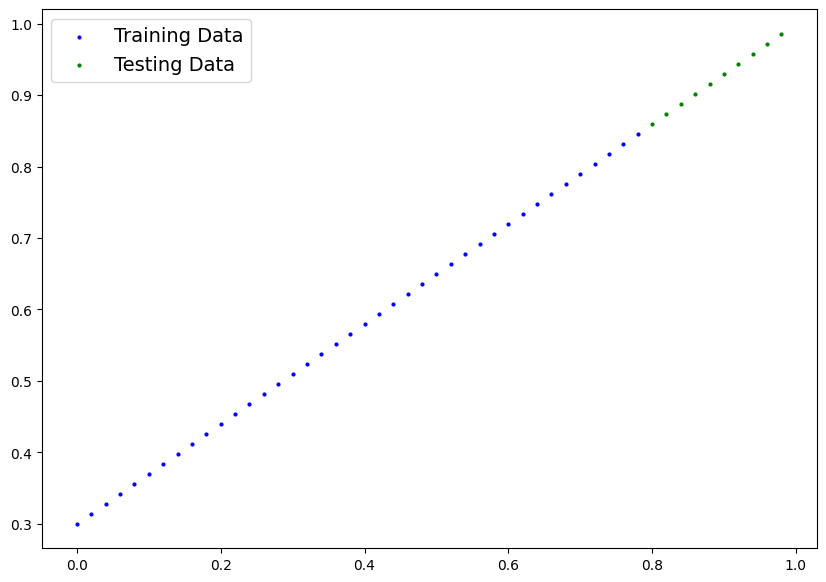

In [7]:
plot_predictions()


## 2. Build model

Our first PyTorch model

What our Model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values(the weights & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - [https://www.youtube.com/watch?v=IHZwWFHWa-w](https://www.youtube.com/watch?v=IHZwWFHWa-w)
2. Backpropagation - [https://www.youtube.com/watch?v=Ilg3gGewQ5U](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

In [8]:
# Create a linear regression model class
# <-- almost everything in PyTorch inherits from nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1,  # <- start with a random weight and try to adjust it to the ideal weight
                        requires_grad=True,  # <- can this parameter be updated via gradient descent
                        dtype=torch.float))  # <- PyTorch loves the datatype torch.float32

        self.bias = nn.Parameter(torch.randn(1,  # <- start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True,  # <- can this parameter be updated via gradient descent
                                             dtype=torch.float))  # <- PyTorch loves the datatype torch.float32

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
        return self.weights * x + self.bias  # this is the linear regression formula


### PyTorch Model building essentials

* torch.nn - contains all of the building blocks for computational graphs(a neural network can be considered a computational graph)
* Parameter - what parameters should out model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they we'll help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

PyTorch Cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check of the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List name parameters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it throuhg out forward method

In [11]:
#  Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

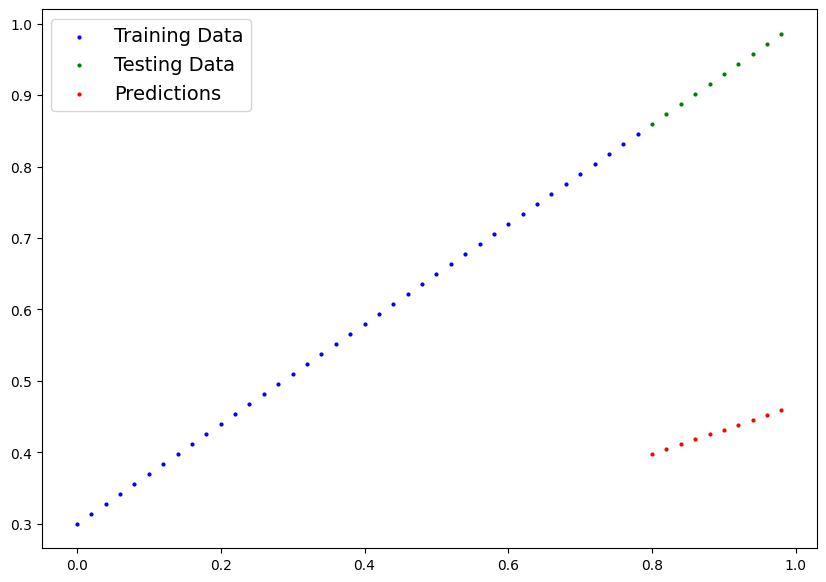

In [12]:
plot_predictions(predictions=y_preds)


## 3. Training model

The whole idea of training is for a model from some *unknow* paramters (these may be random) to some *know* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are, is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For out case, we're going to refer to it as a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
    * Inside the optimizer you'll often have to set two parameters:
        * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in a small change, a large `lr` results in a large change)

And specifically for PyTorch, we need:

* A training loop
* A testing loop


In [13]:
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# Check out model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),  # we want to optimize the parameters present in our model
                            lr=0.01)  # lr = learning rate = possibly the most important value hyperparameter you can set


**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea what works and what doesn't with your particular problem set

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SDG()` will suffice.

But for classification problems like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)


### Builing a traing loop (and a testing loop) in pytorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss (**backpropagation**)
5. Optimizer step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [16]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter we've set it ourself)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training
# 0. Loop though the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1 Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()  # by default how the optimizer changes will accumulate through the loop so... we have to zero them about in step 3 for the next iteration of the loop

    # Testing
    model_0.eval()  # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode():  # turns off gradient tracking & a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out whats happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict
        print(model_0.state_dict())


Epoch: 0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

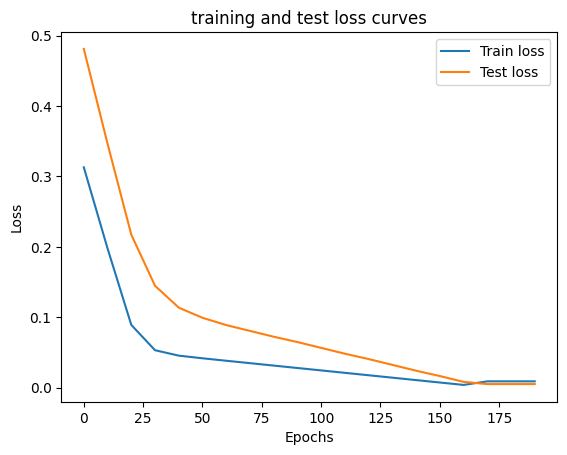

In [17]:
# plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(
    loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [18]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


In [19]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

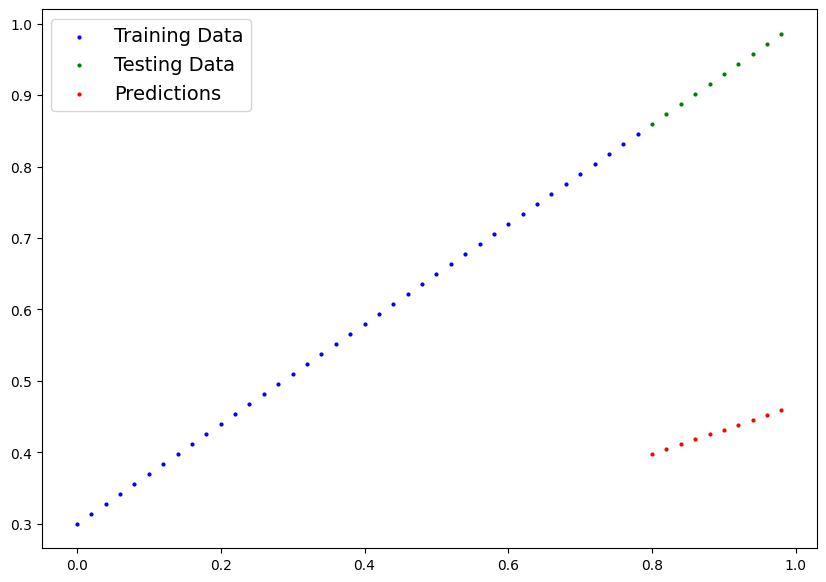

In [20]:
plot_predictions(predictions=y_preds)


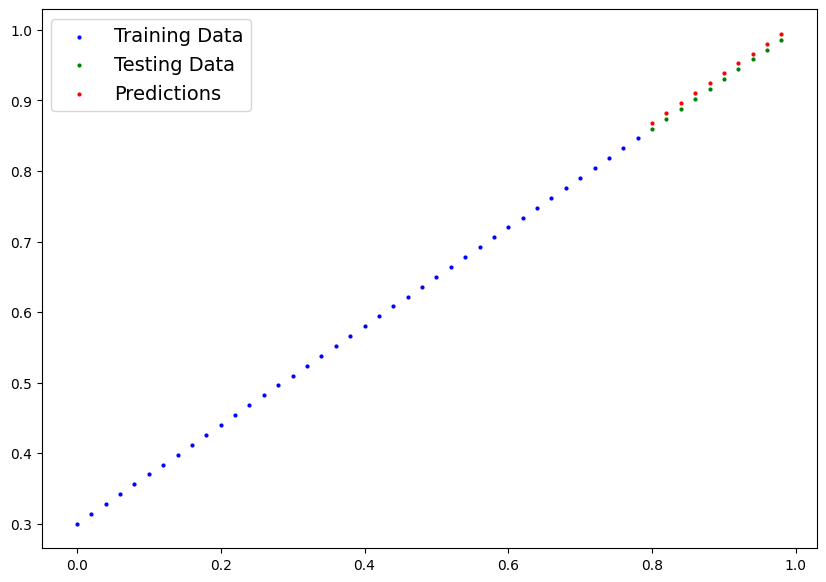

In [21]:
plot_predictions(predictions=y_preds_new)


## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows to save a PyTorch model in Python's pickle format
2. `torch.load()` - allows to load a saved PyTorch model
3. `torch.nn.Module.load.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save & load code + tutorial + extra-curriculum: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [22]:
# Saving out PyTorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: \"{MODEL_SAVE_PATH}\"")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: "models\01_pytorch_workflow_model_0.pth"


## Loading a PyTorch Model

Since we saved out model's `state_dict()`, we'll create a new instance of out model class and load the saved `state_dict()` into that

In [23]:
# To load in a saved state_dict we have to instantiate a new instance of out model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one space

In [28]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'1.12.1+cu116'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [29]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cuda


### 6.1 Data

In [30]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(
    dim=1)  # without unsqueeze, error will pop up
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

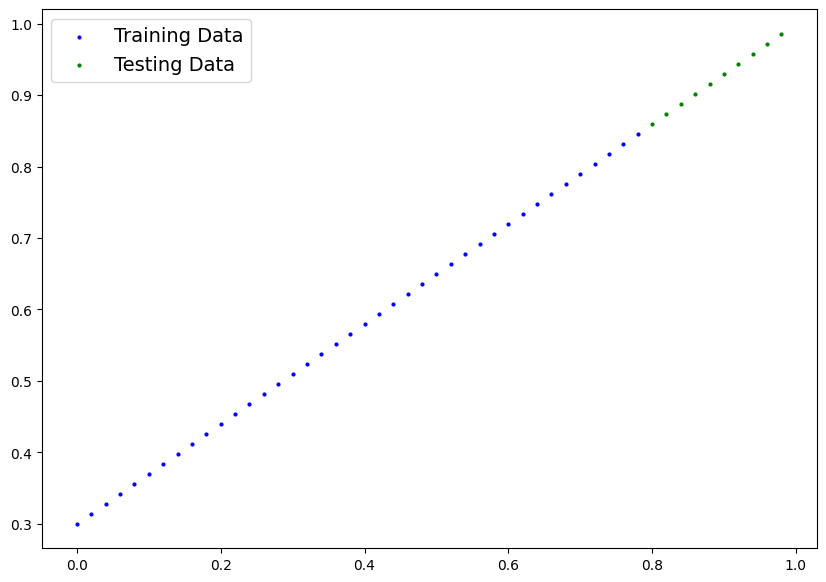

In [32]:
# Plot the data
# Note: if you dont have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)


### 6.2 Building a PyTorch Linear model

In [33]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating the model parameters / also called: Linear transform, probing layer, fully connected layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
# Check the model current device
next(model_1.parameters()).device


device(type='cpu')

In [35]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

### 6.3 Training

For Training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [36]:
# Setup loss function
loss_fn = nn.L1Loss()  # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)


In [37]:
# Write a training loop
torch.manual_seed(42)

epochs = 200

# Put device on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward Pass
    y_pred = model_1(X_train)

    # 2. Calculate Loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [38]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [39]:
weight, bias


(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [40]:
# turn Model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)


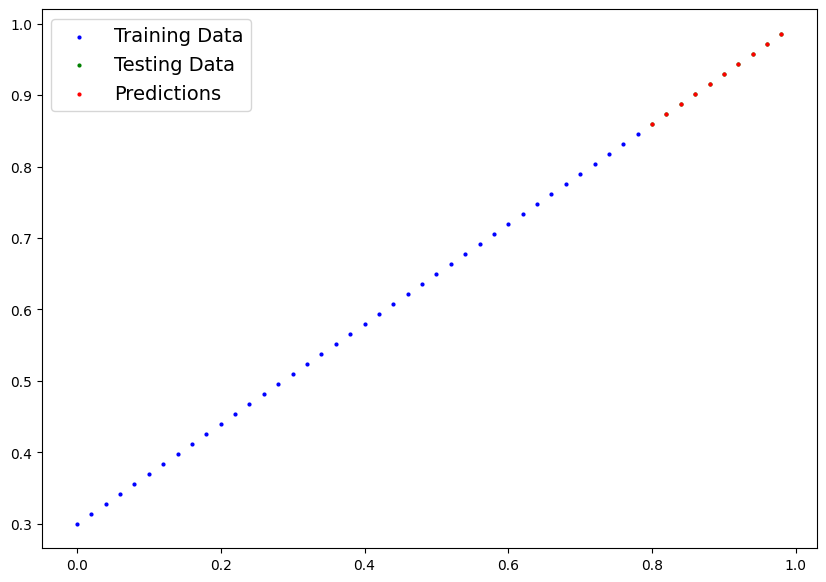

In [41]:
plot_predictions(predictions=y_preds.cpu())


### 6.5 Saving & loading a trained model

In [42]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: \"{MODEL_SAVE_PATH}\"")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: "models\01_pytorch_workflow_model_1.pth"


In [43]:
# Load a PyTorch Model

# Create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [44]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [45]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [46]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')